<a href="https://colab.research.google.com/github/SebIngB/ProblemasClasificacion/blob/main/Trabajo_problemas_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTEGRANTES:

- Juan Camilo Ospina
- Juan Sebastian Alvarado

# PUNTO 1

DATASET ->
Breast Cancer Wisconsin (Diagnostic) Data Set
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import plot_model

import cv2 as cv2
from keras.utils import np_utils

In [ ]:
from tables import Column
path = '/content/drive/MyDrive/Dataset_trabajos_IA/breast-cancer-wisconsin.csv'

dataset = pd.read_csv(path, names=['ID number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape',
                                   'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin',
                                   'Normal Nucleoli','Mitoses','Class'])

y = dataset.Class
X = dataset.drop(columns=['Class','ID number'], axis=1)

print(dataset.shape)
print(X.shape)
print(y.shape)

(699, 11)
(699, 9)
(699,)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID number                    699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=3)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(559, 9)
(140, 9)
(559,)
(140,)


In [ ]:
x_train['Bare Nuclei'] = x_train['Bare Nuclei'].replace('?',np.nan)
x_test['Bare Nuclei'] = x_test['Bare Nuclei'].replace('?',np.nan)

print(x_train['Bare Nuclei'].dtype)
print(x_test['Bare Nuclei'].dtype)

my_imputer = SimpleImputer()
imputed_x_train = pd.DataFrame(my_imputer.fit_transform(x_train))
imputed_x_test = pd.DataFrame(my_imputer.transform(x_test))

imputed_x_train.columns = x_train.columns
imputed_x_test.columns = x_test.columns

print(imputed_x_train['Bare Nuclei'].dtype)
print(imputed_x_test['Bare Nuclei'].dtype)

imputed_x_train.describe()

object
object
float64
float64


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,4.373882,3.109123,3.175313,2.688730,3.200358,3.328440,3.397138,2.881932,1.617174
std,2.802603,3.091306,2.991271,2.781093,2.195450,3.463638,2.414797,3.090687,1.756746
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,3.000000,4.000000,5.000000,4.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<ipython-input-6-0b762f24a692>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


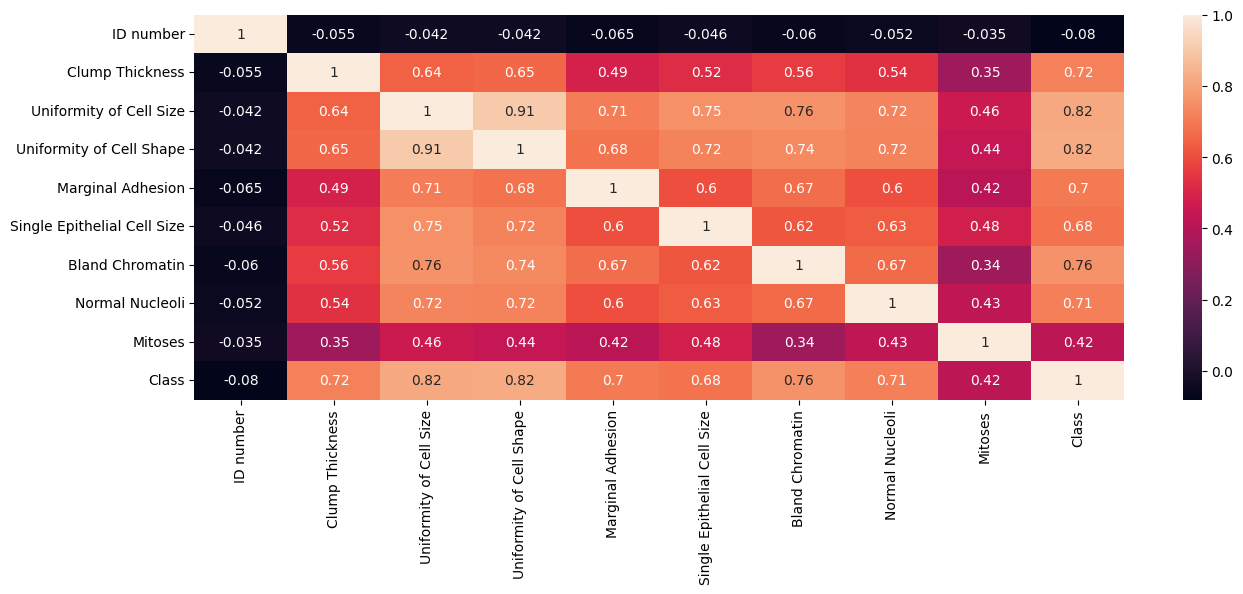

In [ ]:
corr = dataset.corr()
plt.figure(figsize=(15,5))
sn.heatmap(corr, annot=True)
plt.show()

## Normalizacion

In [ ]:
def normalizar(x,xmax,xmin,ymax,ymin):
  m = (ymax-ymin)/(xmax-xmin)
  b = ymin - m*xmin

  y = m*x + b

  return y

In [ ]:
max_x_train = np.max(imputed_x_train).values
min_x_train = np.min(imputed_x_train).values

max_x_test = np.max(imputed_x_test).values
min_x_test = np.min(imputed_x_test).values

max_y_train = np.max(y_train)
min_y_train = np.min(y_train)

max_y_test = np.max(y_test)
min_y_test = np.min(y_test)

x_train_n = normalizar(imputed_x_train,max_x_train,min_x_train,1,0)
x_test_n = normalizar(imputed_x_test,max_x_test,min_x_test,1,0)
y_train_n = normalizar(y_train,max_y_train,min_y_train,1,0)
y_test_n = normalizar(y_test,max_y_test,min_y_test,1,0)

#x_train_n.describe()
#x_test_n.describe()
#y_train_n.describe()
y_test_n.head()

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: Futu

386    1.0
330    1.0
637    0.0
647    0.0
469    0.0
Name: Class, dtype: float64

## Model

In [ ]:
input_dim = x_train.shape[1]
num_clases = 1 #numero de salidas
lr = 1e-3
loss = 'binary_crossentropy'#'mean_square_error'
batch = [10,20,32,40,100]
print(input_dim)

9


In [ ]:
def model():
  model = Sequential()
  model.add(Dense(20, input_dim = input_dim, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(5, activation='relu'))
  model.add(Dense(num_clases, activation='sigmoid'))

  model.summary()

  opt = tf.keras.optimizers.SGD(learning_rate=lr)

  model.compile(loss = loss, optimizer = opt, metrics=['accuracy'])

  return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                200       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________


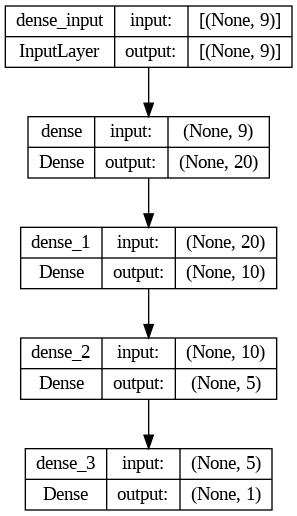

In [ ]:
model = model()
plot_model(model, to_file='model.jpg', show_shapes=True)

In [ ]:
history = model.fit(x_train_n, y_train_n, validation_data=(x_test_n,y_test_n),epochs=1000, verbose = 0)

In [ ]:
score = model.evaluate(x_test_n, y_test_n, verbose = 0) # me entrega el valor de la perdida
print(score)

[0.06441275775432587, 0.9785714149475098]


## Prediccion

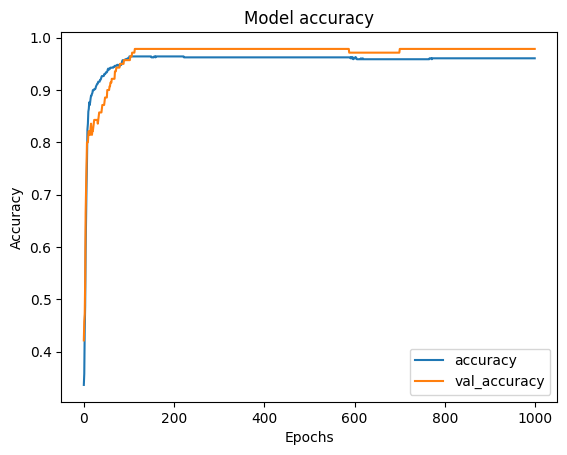

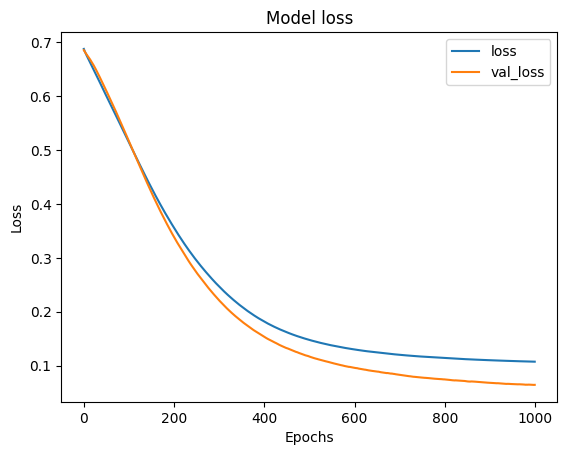

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

# PUNTO 2

a) El problema de clasificacion trabajo con el dataset cifar10 en donde cuenta con 60000 imágenes en color de 32x32 en 10 clases, con 6000 imágenes por clase. Hay 50000 imágenes de entrenamiento y 10000 imágenes de prueba.

Las clases son: Avión, Automóvil, Pájaro, Gato, Ciervo, Perro, Rana, Caballo, Barco y Camión

El conjunto de datos se divide en cinco lotes de entrenamiento y un lote de prueba, cada uno con 10000 imágenes. El lote de prueba contiene exactamente 1000 imágenes seleccionadas al azar de cada clase. Los lotes de entrenamiento contienen las imágenes restantes en orden aleatorio, pero algunos lotes de entrenamiento pueden contener más imágenes de una clase que de otra. Entre ellos, los lotes de entrenamiento contienen exactamente 5000 imágenes de cada clase.  

In [ ]:
from keras.datasets import cifar10

(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = cifar10.load_data()

print(x_train_cifar10.shape)
print(y_train_cifar10.shape)
print(x_test_cifar10.shape)
print(y_test_cifar10.shape)

170498071/170498071 [==============================] - 9s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


[9]


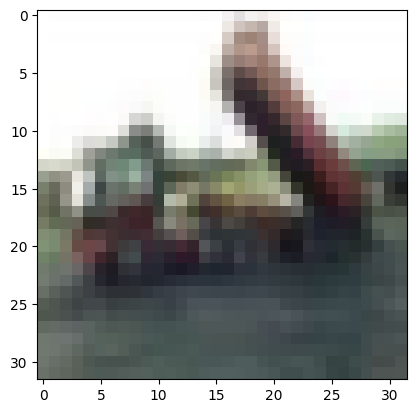

In [ ]:
num_cifar10 = 2
plt.figure()
plt.imshow(x_train_cifar10[num_cifar10], 'gray')
print(y_train_cifar10[num_cifar10])


## Normalizar

In [ ]:
x_train_cifar10_n = x_train_cifar10 / 255
x_test_cifar10_n = x_test_cifar10 / 255

print('min:',np.min(x_train_cifar10_n[0]),'max:',np.max(x_train_cifar10_n[0]))

min: 0.0 max: 1.0


## One-Hot encoding

In [ ]:
y_train_cifar10_n = np_utils.to_categorical(y_train_cifar10)
y_test_cifar10_n = np_utils.to_categorical(y_test_cifar10)

input_shape = x_train_cifar10_n.shape[1:]
num_classes = y_train_cifar10_n.shape[1] # 10

print(y_train_cifar10_n.shape)
print(y_test_cifar10_n.shape)
print(input_shape)
print(num_classes)

(50000, 10)
(10000, 10)
(32, 32, 3)
10


## Model

In [ ]:
def model_cifar10():
  model = Sequential()
  model.add(Conv2D(16,(3,3), input_shape = input_shape, activation = 'relu'))# 30,30,16
  model.add(MaxPooling2D(pool_size=(2,2)))# 15,15,16

  model.add(Conv2D(8,(3,3), activation = 'relu'))# 13,13,8
  model.add(MaxPooling2D(pool_size=(2,2)))# 6,6,8

  model.add(Flatten())
  model.add(Dense(100, activation='relu'))

  model.add(Dropout(0.2))

  model.add(Dense(num_classes, activation = 'softmax'))

  model.summary()

  model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

  return model

In [ ]:
model_cifar10 = model_cifar10()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 8)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [ ]:
history_cifar10 = model_cifar10.fit(x_train_cifar10_n, y_train_cifar10_n, validation_data= (x_test_cifar10_n, y_test_cifar10_n), epochs= 10, batch_size= 32,verbose=0,shuffle=True)

In [ ]:
score_cifar10 = model_cifar10.evaluate(x_test_cifar10_n, y_test_cifar10_n, verbose=0)
print(score_cifar10)

[1.0406403541564941, 0.6331999897956848]


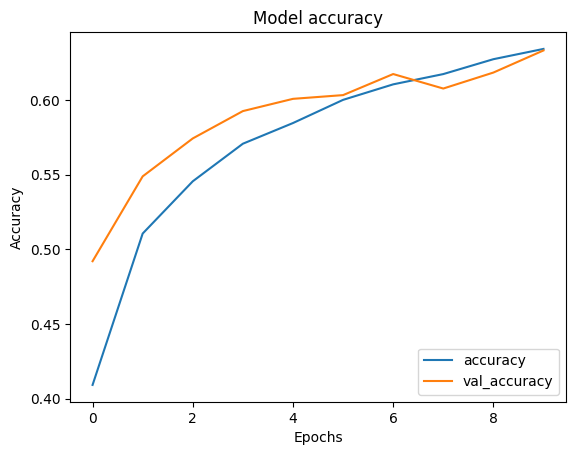

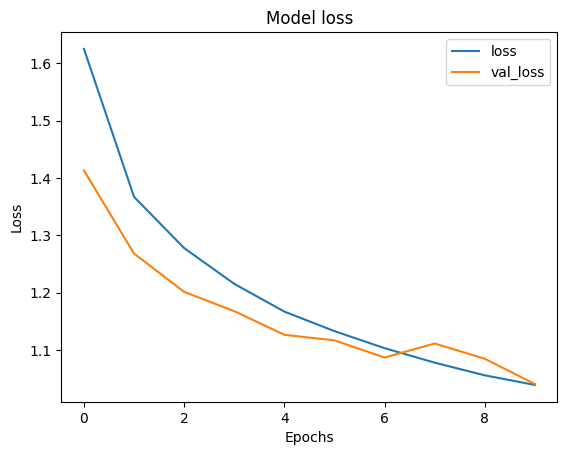

In [ ]:
plt.figure()
plt.plot(history_cifar10.history['accuracy'], label='accuracy')
plt.plot(history_cifar10.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

plt.figure()
plt.plot(history_cifar10.history['loss'], label='loss')
plt.plot(history_cifar10.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

## Prediccion

313/313 [==============================] - 3s 8ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
8


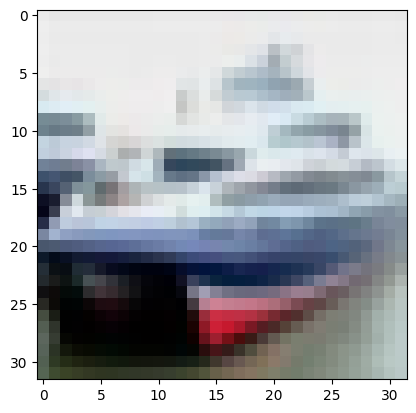

In [ ]:
outputTest_cifar10 = model_cifar10.predict(x_test_cifar10_n)
num1 = 1
print(y_test_cifar10_n[num1])
print(np.argmax(outputTest_cifar10[num1]))
plt.imshow(x_test_cifar10_n[num1],'gray')

In [ ]:
cm = confusion_matrix(y_test_cifar10,np.argmax(outputTest_cifar10, axis=1))
print(cm)

[[613  28  68  17  37  10  18   8 157  44]
 [ 30 757  11   7  12   2  20   5  52 104]
 [ 60  16 508  58 108  97  91  19  28  15]
 [ 20  17  84 369 105 205 114  39  32  15]
 [ 19   6 104  63 592  32  89  75  15   5]
 [  9   4  89 160  63 562  43  48  14   8]
 [  6  10  54  53  44  29 785   5  10   4]
 [ 19   9  41  41  87 120  14 638   9  22]
 [ 58  44  22  14  10   8   8   5 797  34]
 [ 35 101  12  12  18   8  23  17  63 711]]


In [ ]:
def plot_confusion_matrix(cm, num_classes,normalize=True,title='Matrix de Confusion',cmap=plt.cm.Blues):

      import itertools

      classes = ['0', '1', '2','3', '4', '5','6', '7', '8','9']

      plt.figure(figsize = (7,7))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90)
      plt.yticks(tick_marks, classes)
      if normalize:
          cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          cm = np.round(cm,3)
      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                   horizontalalignment="center",
                   color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('Original')
      plt.xlabel('Predicciones')

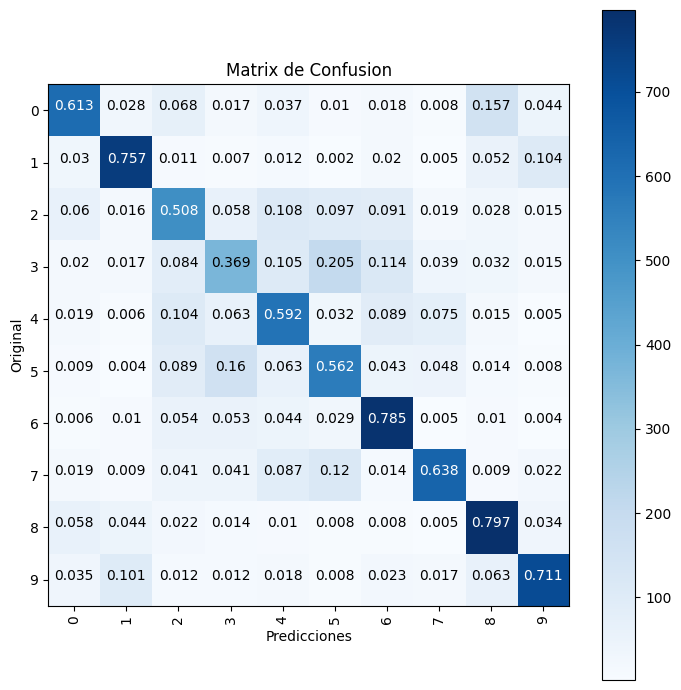

In [ ]:
plot_confusion_matrix(cm, num_classes)